# Image Processing HW1 
**Avisa Fallah 610398208**


##Libraries

In [38]:
import cv2
import cv2 as cv
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ImageProcessing/HW1/Dataset
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
from PIL import ImageChops
import numpy as np
from PIL import Image
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ImageProcessing/HW1/Dataset


##Functions

In [39]:
# Display the original and modified images
def show_original_modified_images(original, modified, text_operation):
  fig, ax = plt.subplots(1, 2, figsize=(9, 7))
  ax[0].imshow(original)
  ax[0].set_title('Original Image')
  ax[1].imshow(modified)
  ax[1].set_title(text_operation)
  plt.show()


##Sampling and Quantization


###Load and display image1


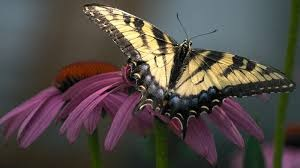

In [40]:
image1 = cv2.imread('image1.jpg')
cv2_imshow(image1)

####a1) Difference between values in neighboring pixels

In [41]:
# Convert the image to a numpy array
image1_array = np.array(image1)

# Print the array
print(image1_array)


[[[118 108  91]
  [118 108  91]
  [118 108  91]
  ...
  [  7  57  39]
  [ 10  55  38]
  [ 10  54  37]]

 [[118 108  91]
  [118 108  91]
  [118 108  91]
  ...
  [  7  57  39]
  [ 10  55  38]
  [ 10  54  37]]

 [[119 109  92]
  [119 109  92]
  [119 109  92]
  ...
  [  8  56  38]
  [ 10  54  37]
  [ 11  53  36]]

 ...

 [[ 24  30  35]
  [ 24  30  35]
  [ 24  30  35]
  ...
  [104  74 109]
  [105  75 110]
  [105  75 110]]

 [[ 23  29  34]
  [ 23  29  34]
  [ 23  29  34]
  ...
  [102  73 106]
  [100  73 106]
  [101  74 107]]

 [[ 22  28  33]
  [ 22  28  33]
  [ 22  28  33]
  ...
  [101  72 105]
  [ 99  72 105]
  [100  73 106]]]


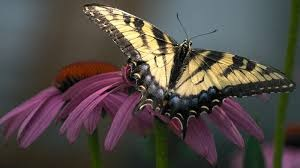

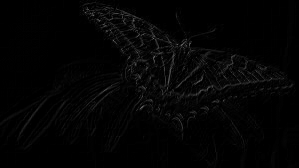

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 2 1 1]
 [0 0 0 ... 1 2 1]
 [0 0 0 ... 0 0 0]]


In [42]:
cv2_imshow(image1)

# Convert the image to grayscale
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Compute the differences between neighboring pixels
diff_x = np.abs(cv2.subtract(gray[:, :-1], gray[:, 1:]))
diff_y = np.abs(cv2.subtract(gray[:-1, :], gray[1:, :]))
diff_y = cv2.resize(diff_y, (diff_x.shape[1], diff_x.shape[0]))
diff = cv2.addWeighted(diff_x, 0.5, diff_y, 0.5, 0)

# Display the resulting differences 
cv2_imshow(diff)
print(diff)


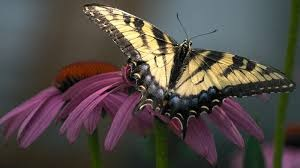

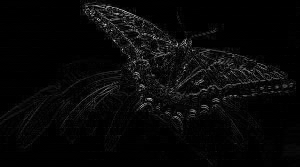

[[0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 2 1 0]
 ...
 [1 1 1 ... 3 2 2]
 [1 1 1 ... 2 3 2]
 [1 1 1 ... 1 1 1]]


In [43]:
cv2_imshow(image1)
# Convert the image to grayscale
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Compute the absolute difference between neighboring pixels
diff = cv2.absdiff(gray[:-1], gray[1:])

# Display the resulting image
cv2_imshow(diff)
print(diff)

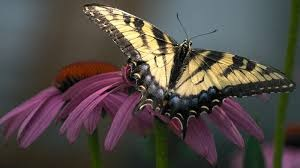

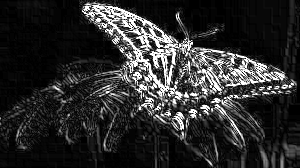

[[ 0.  0.  0. ...  6.  8.  0.]
 [ 4.  4.  4. ...  0.  4.  4.]
 [ 4.  4.  4. ...  8.  2.  6.]
 ...
 [ 8.  8. 10. ... 22. 22. 18.]
 [ 8.  8.  8. ... 14. 18. 14.]
 [ 0.  0.  2. ...  0.  4.  0.]]


In [44]:
cv2_imshow(image1)

# Convert the image to grayscale
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Compute the difference between neighboring pixels using the Sobel operator
dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Compute the absolute difference between dx and dy
diff = cv2.absdiff(dx, dy)

# Display the resulting image
cv2_imshow(diff)
print(diff)
#plt.imshow(diff)
#plt.show()




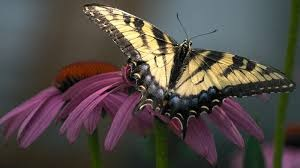

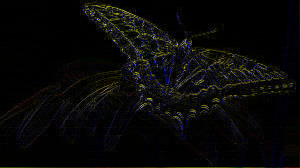

[[  0   0   0 ...   3   0 108]
 [  0   0   0 ...   3   0 108]
 [  0   0   0 ...   2   1 108]
 ...
 [  0   0   0 ...   1   0  81]
 [  0   0   0 ...   2   1  78]
 [  0   0   1 ...   2   1  78]]
[[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  0  1]
 [ 0  0  0 ...  2  1  0]
 ...
 [ 1  1  1 ...  2  5  4]
 [ 1  1  1 ...  1  1  1]
 [96 96 96 ... 94 89 90]]
[[ 0  0  0 ...  2  1 54]
 [ 0  0  0 ...  2  1 54]
 [ 0  0  0 ...  2  1 56]
 ...
 [ 0  0  0 ...  1  0 45]
 [ 0  0  0 ...  0  1 45]
 [ 0  0  1 ...  0  1 45]]
[[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 0  0  0 ...  2  1  0]
 ...
 [ 1  1  1 ...  1  2  1]
 [ 1  1  1 ...  1  1  1]
 [80 80 80 ... 15 17 19]]
[[ 0  0  0 ...  1  1 54]
 [ 0  0  0 ...  1  1 54]
 [ 0  0  0 ...  1  1 56]
 ...
 [ 0  0  0 ...  1  0 75]
 [ 0  0  0 ...  0  1 73]
 [ 0  0  1 ...  0  1 73]]
[[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 0  0  0 ...  2  1  0]
 ...
 [ 1  1  1 ...  3  4  3]
 [ 1  1  1 ...  1  1  1]
 [58 58 58 ... 66 67 69]]


In [45]:
cv2_imshow(image1)

# Split the image into three channels
b, g, r = cv2.split(image1)

# Compute the differences for each channel
diff_x_b = cv2.absdiff(np.roll(b, -1, axis=1), b)
diff_y_b = cv2.absdiff(np.roll(b, -1, axis=0), b)

diff_x_g = cv2.absdiff(np.roll(g, -1, axis=1), g)
diff_y_g = cv2.absdiff(np.roll(g, -1, axis=0), g)

diff_x_r = cv2.absdiff(np.roll(r, -1, axis=1), r)
diff_y_r = cv2.absdiff(np.roll(r, -1, axis=0), r)

# Merge the differences for all three channels
diff_bgr = cv2.merge((diff_x_b, diff_y_g, diff_y_r))
cv2_imshow(diff_bgr)

# Print the differences for the blue channel
print(diff_x_b)
print(diff_y_b)

# Print the differences for the green channel
print(diff_x_g)
print(diff_y_g)

# Print the differences for the red channel
print(diff_x_r)
print(diff_y_r)




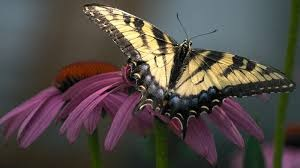

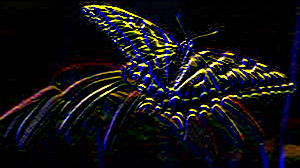

[[[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [ 18.   0.   0.]
  [ 12.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   4.   4.]
  [  0.   4.   4.]
  [  0.   4.   4.]
  ...
  [ 20.  -5.  -5.]
  [ 12.  -4.  -4.]
  [  0.  -4.  -4.]]

 [[  0.   4.   4.]
  [  0.   4.   4.]
  [  0.   4.   4.]
  ...
  [ 24. -11. -11.]
  [ 14.  -8.  -8.]
  [  0.  -6.  -6.]]

 ...

 [[  0.  -8.  -8.]
  [  0.  -8.  -8.]
  [  1.  -9.  -9.]
  ...
  [  0. -17. -23.]
  [  1. -15. -23.]
  [  0. -14. -22.]]

 [[  0.  -8.  -8.]
  [  0.  -8.  -8.]
  [  1.  -7.  -7.]
  ...
  [ -5.  -9. -17.]
  [ -2. -10. -18.]
  [  0. -10. -18.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  2.   0.   0.]
  ...
  [ -8.   0.   0.]
  [ -4.   0.   0.]
  [  0.   0.   0.]]]


In [46]:
cv2_imshow(image1)

# Split the BGR channels
b, g, r = cv2.split(image1)

# Compute the differences for each channel
diff_x_b = cv2.Sobel(b, cv2.CV_64F, 1, 0, ksize=3)
diff_x_g = cv2.Sobel(g, cv2.CV_64F, 1, 0, ksize=3)
diff_x_r = cv2.Sobel(r, cv2.CV_64F, 1, 0, ksize=3)

diff_y_b = cv2.Sobel(b, cv2.CV_64F, 0, 1, ksize=3)
diff_y_g = cv2.Sobel(g, cv2.CV_64F, 0, 1, ksize=3)
diff_y_r = cv2.Sobel(r, cv2.CV_64F, 0, 1, ksize=3)

# Combine the differences for all three channels
diff_bgr = cv2.merge((diff_x_b, diff_y_g, diff_y_r))

# Show the output image
cv2_imshow(diff_bgr)
print(diff_bgr)


####a2) Number of bytes and size of the image

In [47]:
height, width = image1.shape[:2]
  
# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)

# Get the original file size in bytes
original_size = len(image1.tobytes())
print("image Size in Bytes is: ", original_size)


The height of the image is:  168
The width of the image is:  300
image Size in Bytes is:  151200


####b1) Representation the image with unit-8 data type

Data Type: uint8


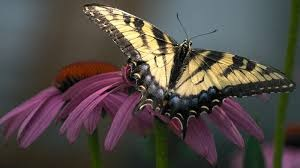

[[[118 108  91]
  [118 108  91]
  [118 108  91]
  ...
  [  7  57  39]
  [ 10  55  38]
  [ 10  54  37]]

 [[118 108  91]
  [118 108  91]
  [118 108  91]
  ...
  [  7  57  39]
  [ 10  55  38]
  [ 10  54  37]]

 [[119 109  92]
  [119 109  92]
  [119 109  92]
  ...
  [  8  56  38]
  [ 10  54  37]
  [ 11  53  36]]

 ...

 [[ 24  30  35]
  [ 24  30  35]
  [ 24  30  35]
  ...
  [104  74 109]
  [105  75 110]
  [105  75 110]]

 [[ 23  29  34]
  [ 23  29  34]
  [ 23  29  34]
  ...
  [102  73 106]
  [100  73 106]
  [101  74 107]]

 [[ 22  28  33]
  [ 22  28  33]
  [ 22  28  33]
  ...
  [101  72 105]
  [ 99  72 105]
  [100  73 106]]]


In [48]:
print('Data Type:',image1.dtype)

# Convert the image to uint8 data type
img_uint8 = image1.astype(np.uint8)

# Display the image
cv2_imshow(img_uint8)
print(img_uint8)

####b2) Representation the image with default type (float 64) 

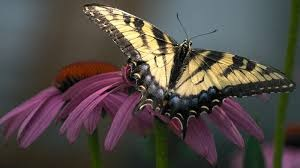

[[[0.4627451  0.42352941 0.35686275]
  [0.4627451  0.42352941 0.35686275]
  [0.4627451  0.42352941 0.35686275]
  ...
  [0.02745098 0.22352941 0.15294118]
  [0.03921569 0.21568627 0.14901961]
  [0.03921569 0.21176471 0.14509804]]

 [[0.4627451  0.42352941 0.35686275]
  [0.4627451  0.42352941 0.35686275]
  [0.4627451  0.42352941 0.35686275]
  ...
  [0.02745098 0.22352941 0.15294118]
  [0.03921569 0.21568627 0.14901961]
  [0.03921569 0.21176471 0.14509804]]

 [[0.46666667 0.42745098 0.36078431]
  [0.46666667 0.42745098 0.36078431]
  [0.46666667 0.42745098 0.36078431]
  ...
  [0.03137255 0.21960784 0.14901961]
  [0.03921569 0.21176471 0.14509804]
  [0.04313725 0.20784314 0.14117647]]

 ...

 [[0.09411765 0.11764706 0.1372549 ]
  [0.09411765 0.11764706 0.1372549 ]
  [0.09411765 0.11764706 0.1372549 ]
  ...
  [0.40784314 0.29019608 0.42745098]
  [0.41176471 0.29411765 0.43137255]
  [0.41176471 0.29411765 0.43137255]]

 [[0.09019608 0.11372549 0.13333333]
  [0.09019608 0.11372549 0.13333333]


In [49]:
cv2_imshow(image1)

# Convert the image to float64
img_float64 = img_as_float(image1)
print(img_float64)


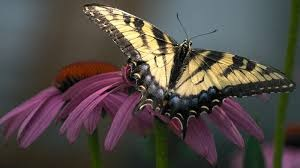

[[[118. 108.  91.]
  [118. 108.  91.]
  [118. 108.  91.]
  ...
  [  7.  57.  39.]
  [ 10.  55.  38.]
  [ 10.  54.  37.]]

 [[118. 108.  91.]
  [118. 108.  91.]
  [118. 108.  91.]
  ...
  [  7.  57.  39.]
  [ 10.  55.  38.]
  [ 10.  54.  37.]]

 [[119. 109.  92.]
  [119. 109.  92.]
  [119. 109.  92.]
  ...
  [  8.  56.  38.]
  [ 10.  54.  37.]
  [ 11.  53.  36.]]

 ...

 [[ 24.  30.  35.]
  [ 24.  30.  35.]
  [ 24.  30.  35.]
  ...
  [104.  74. 109.]
  [105.  75. 110.]
  [105.  75. 110.]]

 [[ 23.  29.  34.]
  [ 23.  29.  34.]
  [ 23.  29.  34.]
  ...
  [102.  73. 106.]
  [100.  73. 106.]
  [101.  74. 107.]]

 [[ 22.  28.  33.]
  [ 22.  28.  33.]
  [ 22.  28.  33.]
  ...
  [101.  72. 105.]
  [ 99.  72. 105.]
  [100.  73. 106.]]]


In [50]:
cv2_imshow(image1)

# Convert the image to float64
img_float64 = image1.astype('float64')
print(img_float64)

####b3) Representation the image by adding bias (128) and plot it

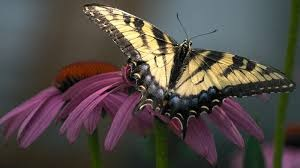

[[[118 108  91]
  [118 108  91]
  [118 108  91]
  ...
  [  7  57  39]
  [ 10  55  38]
  [ 10  54  37]]

 [[118 108  91]
  [118 108  91]
  [118 108  91]
  ...
  [  7  57  39]
  [ 10  55  38]
  [ 10  54  37]]

 [[119 109  92]
  [119 109  92]
  [119 109  92]
  ...
  [  8  56  38]
  [ 10  54  37]
  [ 11  53  36]]

 ...

 [[ 24  30  35]
  [ 24  30  35]
  [ 24  30  35]
  ...
  [104  74 109]
  [105  75 110]
  [105  75 110]]

 [[ 23  29  34]
  [ 23  29  34]
  [ 23  29  34]
  ...
  [102  73 106]
  [100  73 106]
  [101  74 107]]

 [[ 22  28  33]
  [ 22  28  33]
  [ 22  28  33]
  ...
  [101  72 105]
  [ 99  72 105]
  [100  73 106]]]


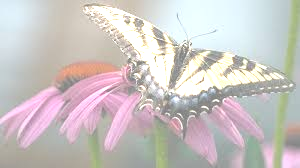

[[[246 236 219]
  [246 236 219]
  [246 236 219]
  ...
  [135 185 167]
  [138 183 166]
  [138 182 165]]

 [[246 236 219]
  [246 236 219]
  [246 236 219]
  ...
  [135 185 167]
  [138 183 166]
  [138 182 165]]

 [[247 237 220]
  [247 237 220]
  [247 237 220]
  ...
  [136 184 166]
  [138 182 165]
  [139 181 164]]

 ...

 [[152 158 163]
  [152 158 163]
  [152 158 163]
  ...
  [232 202 237]
  [233 203 238]
  [233 203 238]]

 [[151 157 162]
  [151 157 162]
  [151 157 162]
  ...
  [230 201 234]
  [228 201 234]
  [229 202 235]]

 [[150 156 161]
  [150 156 161]
  [150 156 161]
  ...
  [229 200 233]
  [227 200 233]
  [228 201 234]]]


In [51]:
cv2_imshow(image1)
print(image1)

# Add the bias using NumPy
biased_image = np.int16(image1) + 128
biased_image = np.clip(biased_image, 0, 255)
biased_image = np.uint8(biased_image)

# Display the biased image
cv2_imshow(biased_image)
print(biased_image)


#####Representation and plot the image with unit-8 data type by adding bias (128)


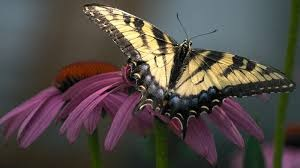

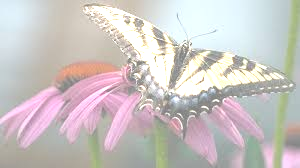

[[[246 236 219]
  [246 236 219]
  [246 236 219]
  ...
  [135 185 167]
  [138 183 166]
  [138 182 165]]

 [[246 236 219]
  [246 236 219]
  [246 236 219]
  ...
  [135 185 167]
  [138 183 166]
  [138 182 165]]

 [[247 237 220]
  [247 237 220]
  [247 237 220]
  ...
  [136 184 166]
  [138 182 165]
  [139 181 164]]

 ...

 [[152 158 163]
  [152 158 163]
  [152 158 163]
  ...
  [232 202 237]
  [233 203 238]
  [233 203 238]]

 [[151 157 162]
  [151 157 162]
  [151 157 162]
  ...
  [230 201 234]
  [228 201 234]
  [229 202 235]]

 [[150 156 161]
  [150 156 161]
  [150 156 161]
  ...
  [229 200 233]
  [227 200 233]
  [228 201 234]]]


In [52]:
cv2_imshow(image1)
bias = np.ones(image1.shape, dtype=np.uint8) * 128
biased_img = cv2.add(image1, bias)
cv2_imshow(biased_img)
print(biased_img)

#####Representation and plot the image with default type (float 64) by adding bias (128) 

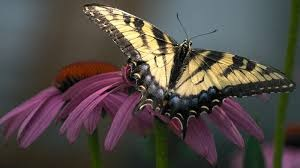

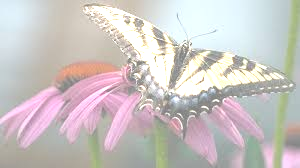

[[[246 236 219]
  [246 236 219]
  [246 236 219]
  ...
  [135 185 167]
  [138 183 166]
  [138 182 165]]

 [[246 236 219]
  [246 236 219]
  [246 236 219]
  ...
  [135 185 167]
  [138 183 166]
  [138 182 165]]

 [[247 237 220]
  [247 237 220]
  [247 237 220]
  ...
  [136 184 166]
  [138 182 165]
  [139 181 164]]

 ...

 [[152 158 163]
  [152 158 163]
  [152 158 163]
  ...
  [232 202 237]
  [233 203 238]
  [233 203 238]]

 [[151 157 162]
  [151 157 162]
  [151 157 162]
  ...
  [230 201 234]
  [228 201 234]
  [229 202 235]]

 [[150 156 161]
  [150 156 161]
  [150 156 161]
  ...
  [229 200 233]
  [227 200 233]
  [228 201 234]]]


In [53]:
# Convert the image to float64
image_float64 = np.float64(image1)
cv2_imshow(image_float64)

# Add the bias using NumPy
biased_image_float64 = image_float64 + 128

# Convert the image back to uint8
biased_image = np.uint8(np.clip(biased_image_float64, 0, 255))

# Display the biased image
cv2_imshow(biased_image)
print(biased_image)

####c) All cases of different number of bits for our image

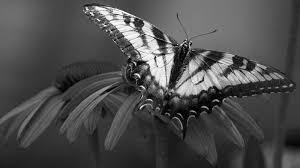

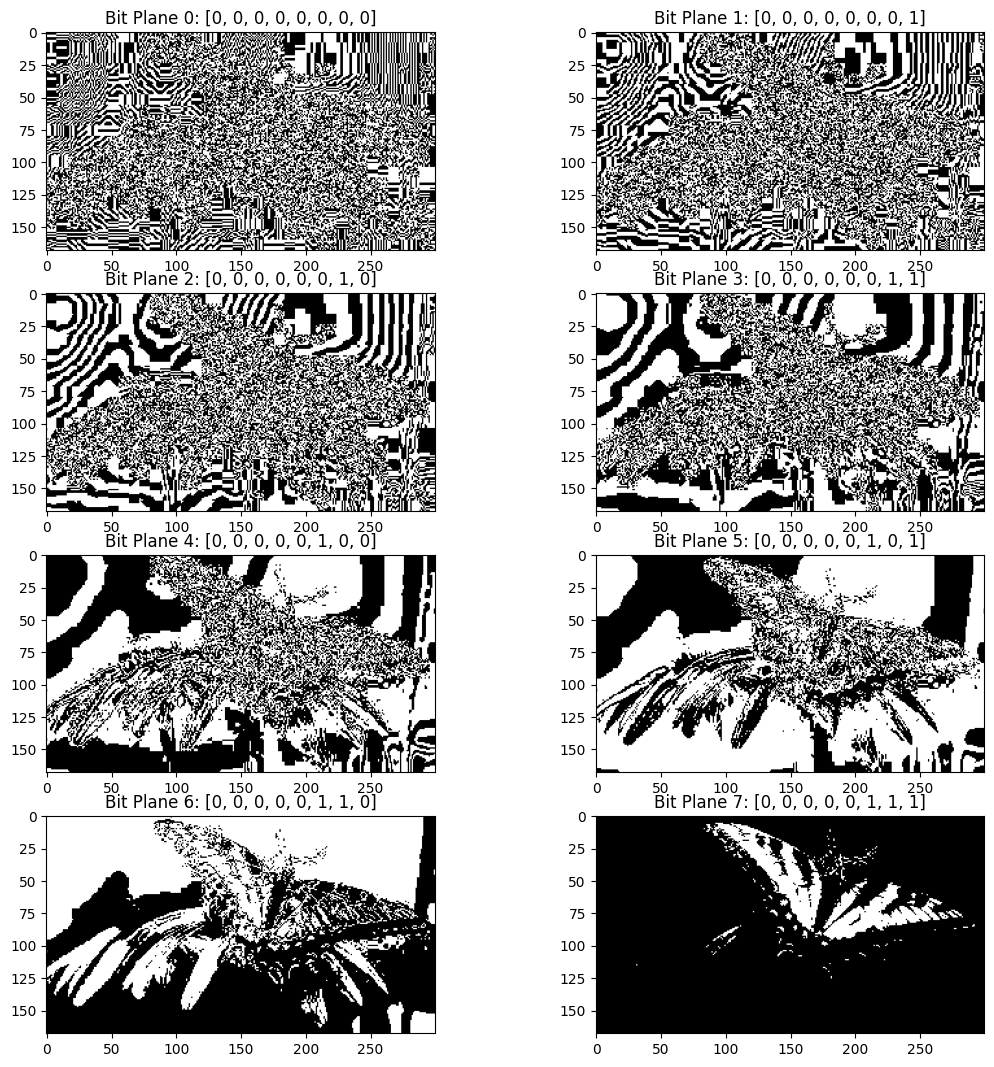

In [54]:
# Define a function to discriminate a bit plane from an image
def discriminate_bit(bit_plane, img):
    binary_mask = 2**bit_plane
    return (img & binary_mask)

# Define a function to convert a decimal number to a binary list of 8 bits
def cov_binary(num):
    binary_num = list(bin(num)[2:].zfill(8))
    binary_num = [int(i) for i in binary_num]
    return binary_num

# Read the image
image1 = cv2.imread("image1.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(image1)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(13)
fig.set_figwidth(13)

for i in range(1,9):
    fig.add_subplot(4,2,i)
    plt.imshow(discriminate_bit(i-1,image1), cmap='gray')
    plt.title("Bit Plane " + str(i-1) + ": " + str(cov_binary(i-1)))

plt.show(block=True)


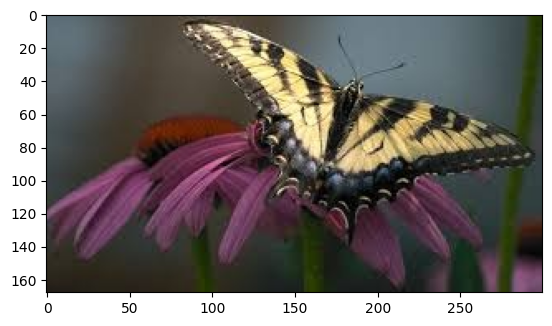

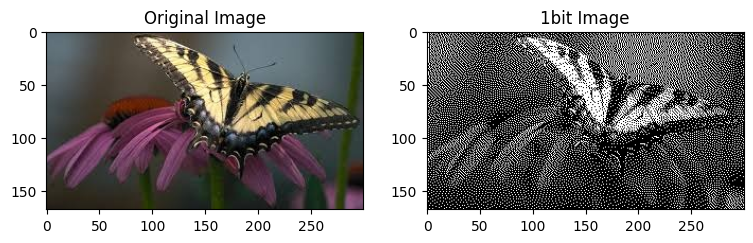

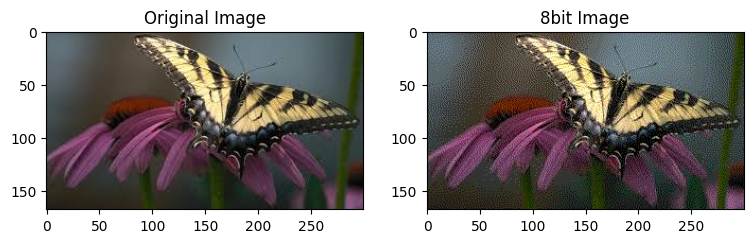

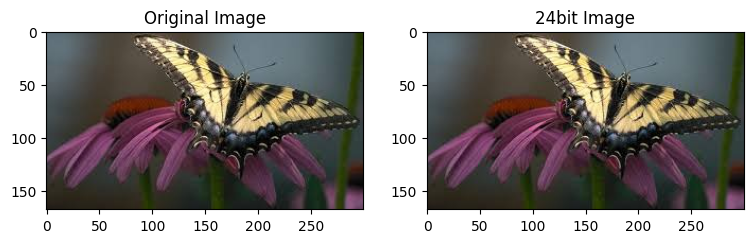

In [55]:
file_name_1 = "image1.jpg"
img_BGR_1 = cv2.imread(file_name_1,1)
img_color_1 = cv2.cvtColor(img_BGR_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_color_1)
plt.show()

# Open the image using PIL
image = Image.open(file_name_1)

# using convert method for img1
img_1bit = image.convert("1")
show_original_modified_images(img_color_1, img_1bit, "1bit Image")

# using convert method for img1
img_8bit = image.convert("P")
show_original_modified_images(img_color_1, img_8bit, "8bit Image")

# using convert method for img1
img_24bit = image.convert("RGB")
show_original_modified_images(img_color_1, img_24bit, "24bit Image")


##Geometrical spatial operations





###Load and display image2


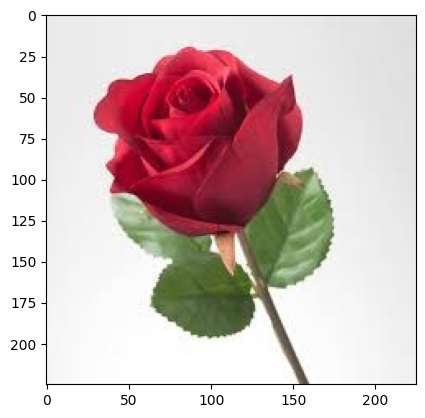

In [56]:
file_name_2 = "image2.jpg"
img_BGR_2 = cv2.imread(file_name_2,1)
img_color_2 = cv2.cvtColor(img_BGR_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_color_2)
plt.show()


###Perform operations

####a) scaling (1.5*1.5)


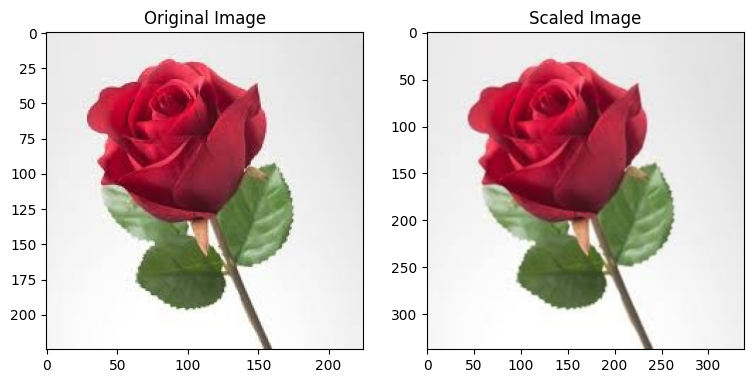

In [57]:
# Scale the image by a factor of 1.5
scaled_image = cv2.resize(img_color_2, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
show_original_modified_images(img_color_2, scaled_image, "Scaled Image")


####b) Translation 

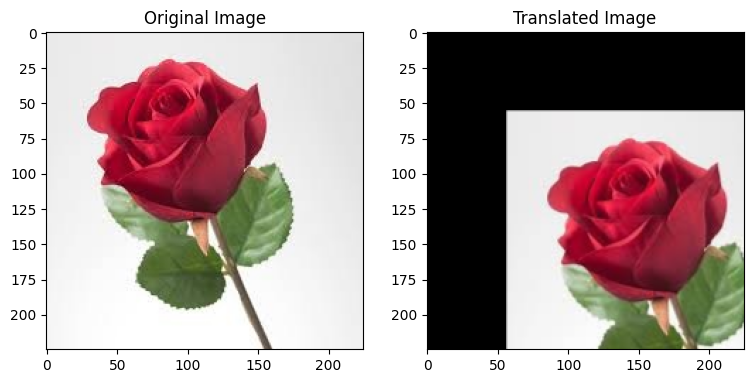

In [58]:
# Store height and width of the image
height, width = img_color_2.shape[:2]
tx = width / 4
ty = height / 4
T = np.float32([[1, 0, tx], [0, 1, ty]])

# We use warpAffine to transform the image using the matrix T
translated_image = cv2.warpAffine(img_color_2, T, (width, height))
show_original_modified_images(img_color_2, translated_image, "Translated Image")


####c) Rotation (90°) 

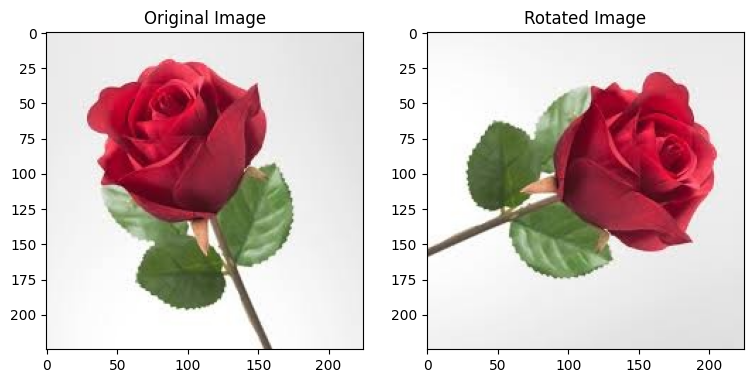

In [59]:
# rotate the image by 90 degrees clockwise
rotated_img = cv2.rotate(img_color_2, cv2.ROTATE_90_CLOCKWISE)
show_original_modified_images(img_color_2, rotated_img, "Rotated Image")


##Histogram equalization

###Load and display image3


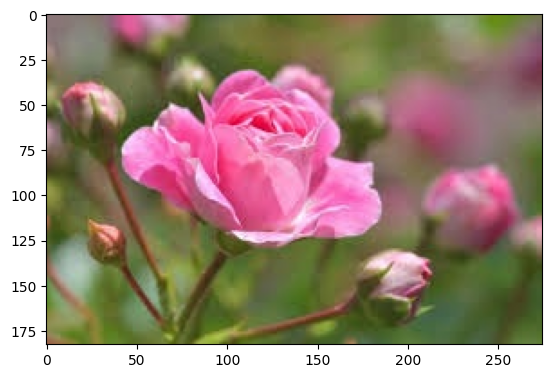

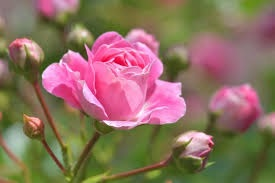

In [60]:
file_name_3 = "image3.jpg"
img_BGR_3 = cv2.imread(file_name_3,1)
img_color_3 = cv2.cvtColor(img_BGR_3, cv2.COLOR_BGR2RGB)
plt.imshow(img_color_3)
plt.show()

image3 = cv2.imread('image3.jpg')
cv2_imshow(image3)

####Creating dataset for Guassian PMF and CMF with mu=0 and sigma=1

In [61]:
num_list = [0.01*(i+1)*(101-i) for i in range(50)]
num_list.extend(num_list[::-1])
num_list.append(num_list[0])

# normalize the list to have a sum of 1
total_sum = sum(num_list)
num_list = [i/total_sum for i in num_list]

print(len(num_list))

101


In [62]:
start = -1
stop = 1
step = 0.02
xk = np.arange(start, stop+step, step)
print(len(xk))

101


###Display Gaussian Probability Mass Function (PMF) with mu=0 and sigma=1

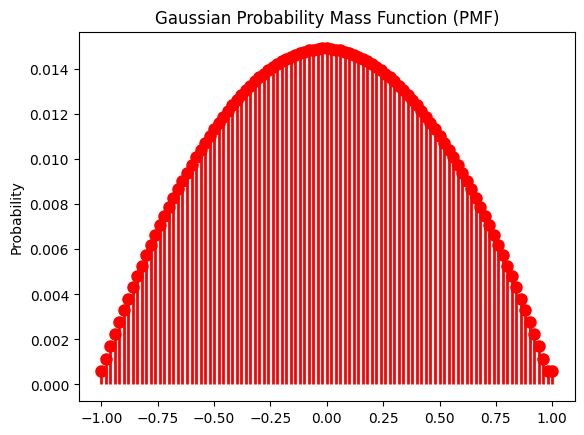

In [63]:
pk = num_list
custm = stats.rv_discrete(name='custm', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=8, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', linestyles='-', lw=2)
plt.title('Gaussian Probability Mass Function (PMF)')
plt.ylabel('Probability')
plt.show()

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0.35711257  1

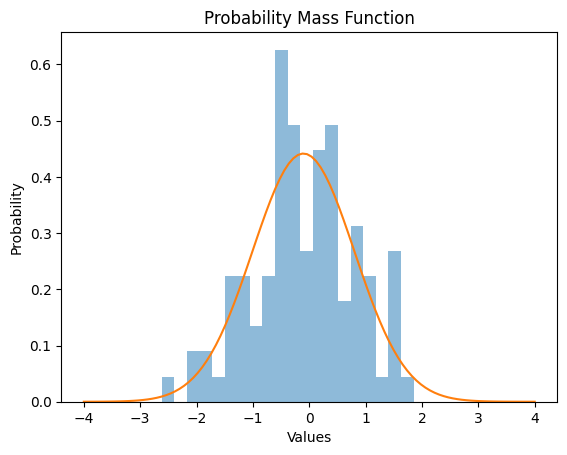

In [64]:


# Set the random seed for reproducibility
np.random.seed(42)

# Generate the population of 100 numbers with Gaussian distribution
population = np.random.normal(loc=0, scale=1, size=100)
print(population)

# Create a histogram of the population
counts, bins, patches = plt.hist(population, density=True,histtype ='bar', alpha=0.5, bins=20)

# Create a normal distribution object with the same mean and standard deviation as the population
mu, std = norm.fit(population)
dist = norm(mu, std)

# Create an array of x values to plot the PMF
x = np.linspace(-4, 4, 100)

# Plot the PMF
plt.plot(x, dist.pdf(x))

# Set the title and axis labels
plt.title("Probability Mass Function")
plt.xlabel("Values")
plt.ylabel("Probability")

# Show the plot
plt.show()


 ### Display Cumulative Mass Function (CMF) with mu=0 and sigma=1

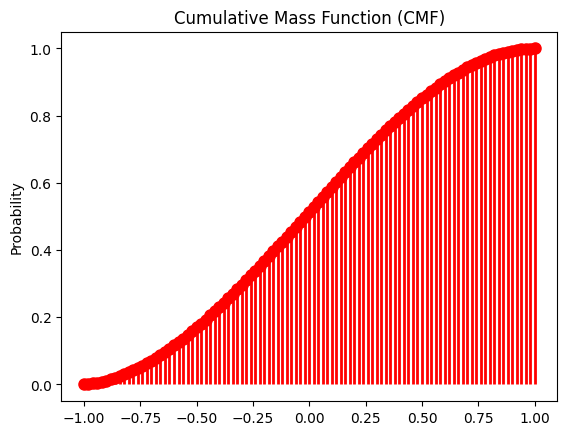

In [65]:
cmf = np.cumsum(pk)
fig, ax = plt.subplots(1, 1)
ax.plot(xk, cmf, 'ro', ms=8, mec='r')
ax.vlines(xk, 0, cmf, colors='r', linestyles='-', lw=2)
plt.title('Cumulative Mass Function (CMF)')
plt.ylabel('Probability')
plt.show()

####Compare CMF and PMF

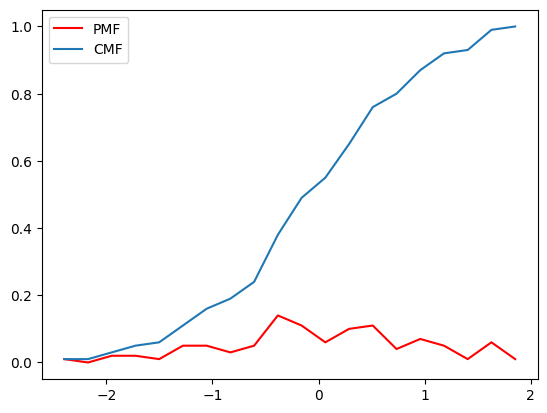

In [66]:
pmf = counts/sum(counts)
cmf = np.cumsum(pmf)

plt.plot(bins[1:], pmf, color="red", label="PMF")
plt.plot(bins[1:], cmf, label="CMF")
plt.legend()

####apply histogram equalization in image3 and plot the histogram 

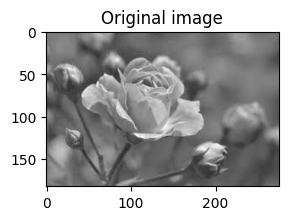

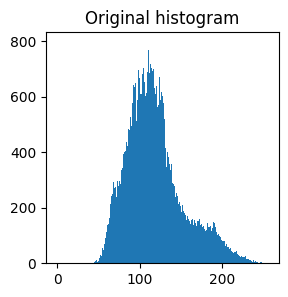

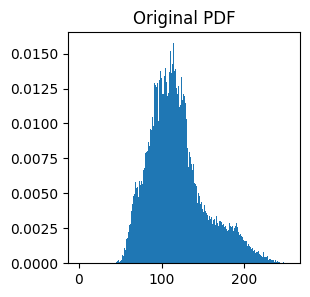

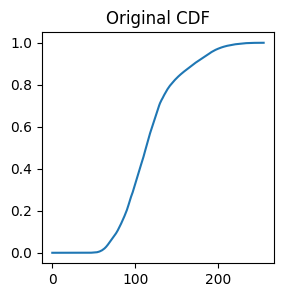

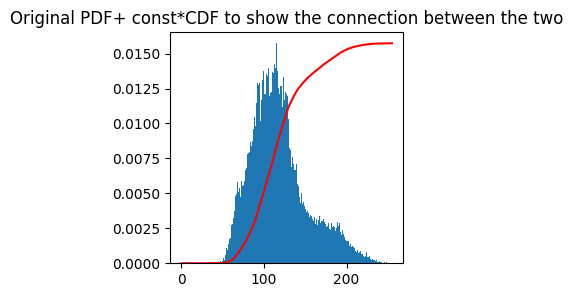

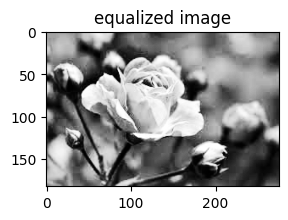

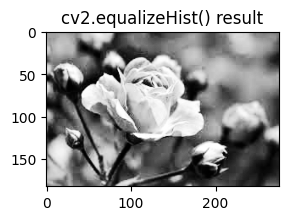

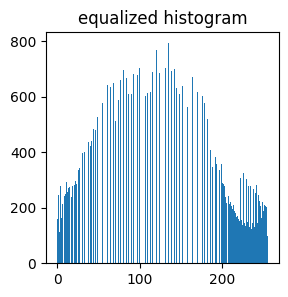

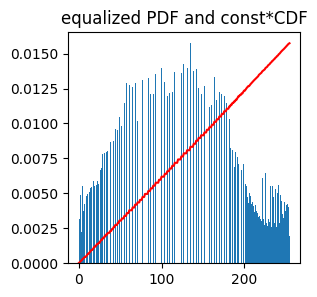

In [67]:
figsize = (3, 3)
# First, read the image as grayscale 
#read as grayscale
IMG = cv2.imread("image3.jpg", 0)

plt.figure(figsize=figsize)
plt.imshow(IMG, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.show()

#Let's start by calculating and showing the original histogram

bins_edges_min_max = [0, 256]
num_bins = 256
bin_count, bins_edges = np.histogram(IMG, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

def draw_hist(x_axis, input):
    fig, ax = plt.subplots(figsize=figsize)
    # why not using plt.hist? because we want to plot also some derivations of this hist, so this is easier
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


draw_hist(bins_start, bin_count)
plt.title("Original histogram")
plt.show()

#Normalize the histogram to gat a discrete PDF
pdf = bin_count / np.sum(bin_count)

draw_hist(bins_start, pdf)
plt.title("Original PDF")
plt.show()


#Get the CDF by calculating the cumulative sum of the pdf data
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")
plt.show()

fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("Original PDF+ const*CDF to show the connection between the two")
plt.show()

#The final step is to un-normalize the CDF to become the equalization function
f_eq = np.round(cdf * 255).astype(int)

f_eq

#Use the equalization function to get the equalized image
IMG_eq = f_eq[IMG]

plt.figure(figsize=figsize)
plt.imshow(IMG_eq, cmap="gray", vmin=0, vmax=255)
plt.title("equalized image")
plt.show()

#cv2 histogram equalization function
IMG_eq_cv2 = cv2.equalizeHist(IMG)

plt.figure(figsize=figsize)
plt.imshow(IMG_eq_cv2, cmap="gray", vmin=0, vmax=255)
plt.title("cv2.equalizeHist() result")
plt.show()

#Plot the equalized histogram, PDF and CDF
bin_count, bins_edges = np.histogram(IMG_eq, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

draw_hist(bins_start, bin_count)
plt.title("equalized histogram")
plt.show()


pdf = bin_count / np.sum(bin_count)
cdf = np.cumsum(pdf)

fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("equalized PDF and const*CDF")
plt.show()





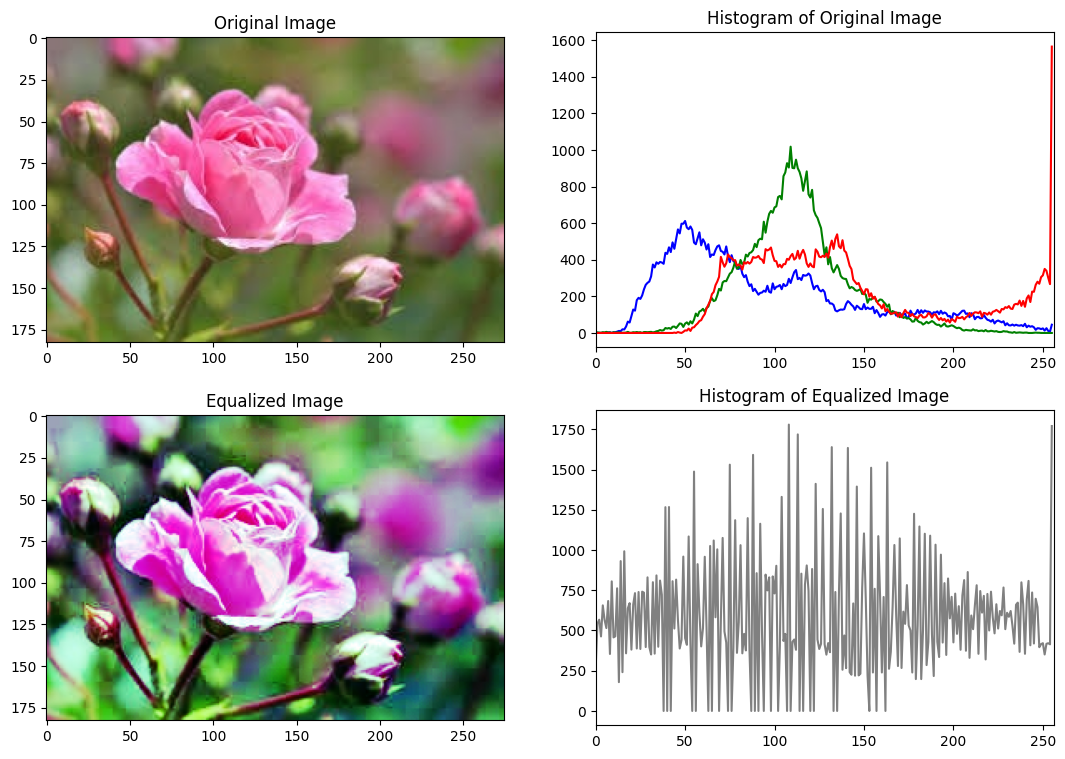

In [68]:
# Load the color image
img = cv2.imread('image3.jpg')

# Split the image into color channels
b, g, r = cv2.split(img)

# Apply histogram equalization to each color channel
eq_b = cv2.equalizeHist(b)
eq_g = cv2.equalizeHist(g)
eq_r = cv2.equalizeHist(r)

# Merge the equalized color channels back into an image
equalized_img = cv2.merge([eq_b, eq_g, eq_r])

# Calculate histograms for each color channel and the equalized image
hist_b, bins_b = np.histogram(b.flatten(), 256, [0, 256])
hist_g, bins_g = np.histogram(g.flatten(), 256, [0, 256])
hist_r, bins_r = np.histogram(r.flatten(), 256, [0, 256])
equalized_hist, bins_eq = np.histogram(equalized_img.flatten(), 256, [0, 256])

# Plot the histograms
plt.figure(figsize=(13,9))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.plot(hist_b, color='b')
plt.plot(hist_g, color='g')
plt.plot(hist_r, color='r')
plt.xlim([0, 256])
plt.title('Histogram of Original Image')
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.subplot(2, 2, 4)
plt.plot(equalized_hist, color='gray')
plt.xlim([0, 256])
plt.title('Histogram of Equalized Image')
plt.show()


 #### apply histogram matching transform in image3 and plot the histogram 

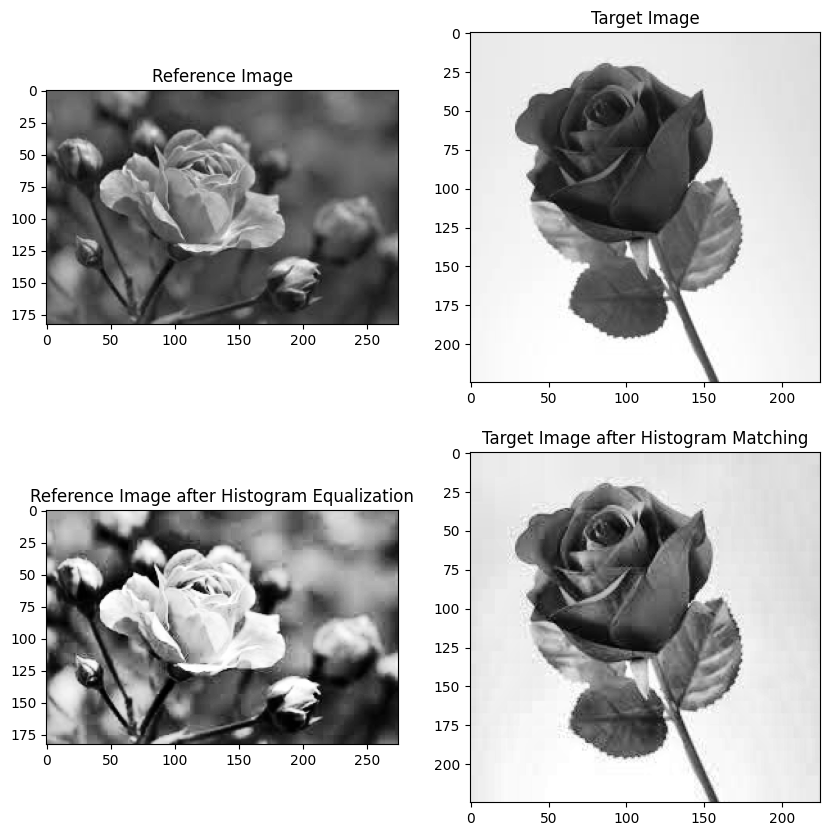

In [69]:
# Load the reference image and the target image
ref_image = cv2.imread('image3.jpg', cv2.IMREAD_GRAYSCALE)
tgt_image = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization to the reference image
ref_hist_eq = cv2.equalizeHist(ref_image)

# Apply histogram matching to the target image
match_hist = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
tgt_hist_match = match_hist.apply(tgt_image)

# Show the original and transformed images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(ref_image, cmap='gray')
axs[0, 0].set_title('Reference Image')
axs[0, 1].imshow(tgt_image, cmap='gray')
axs[0, 1].set_title('Target Image')
axs[1, 0].imshow(ref_hist_eq, cmap='gray')
axs[1, 0].set_title('Reference Image after Histogram Equalization')
axs[1, 1].imshow(tgt_hist_match, cmap='gray')
axs[1, 1].set_title('Target Image after Histogram Matching')

plt.show()


No of Channel is: 3
No of Channel is: 3


<ipython-input-70-d847a4f26b5f>:10: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = match_histograms(image, reference ,


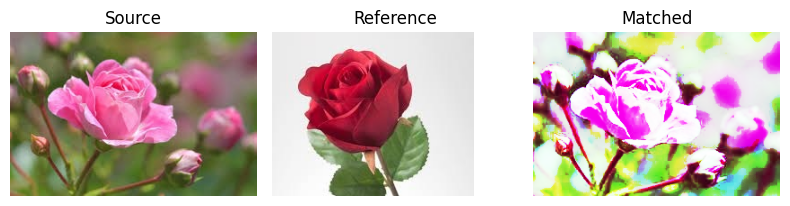

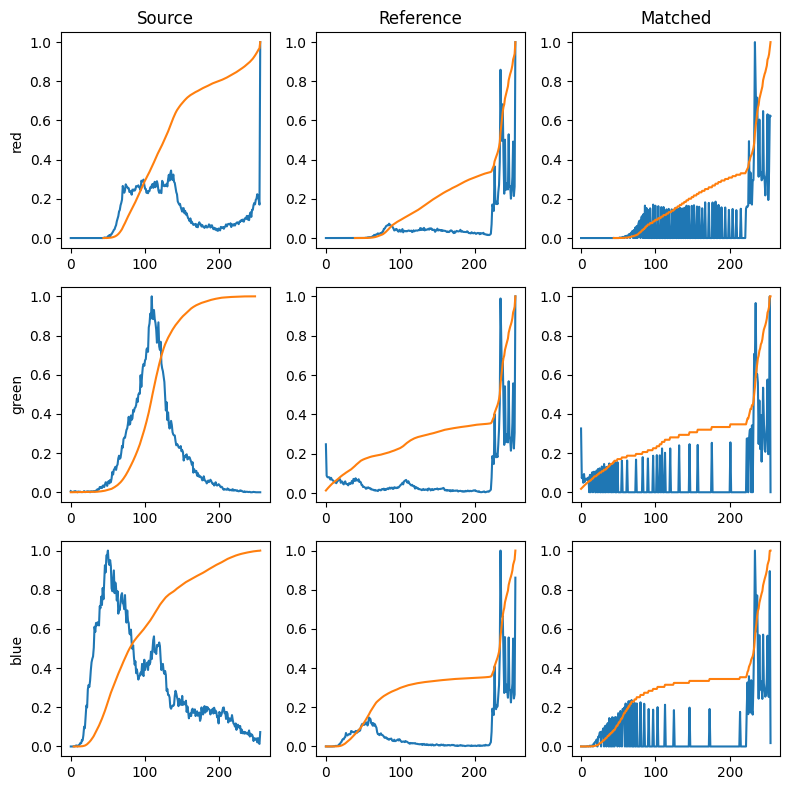

In [70]:
# checking the number of channels
print('No of Channel is: ' + str(img_color_3.ndim))

# checking the number of channels
print('No of Channel is: ' + str(img_color_2.ndim))

image = img_color_3
reference = img_color_2

matched = match_histograms(image, reference ,
						multichannel=True)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,
									figsize=(8, 3),
									sharex=True, sharey=True)

for aa in (ax1, ax2, ax3):
	aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

for i, img in enumerate((image, reference, matched)):
	for c, c_color in enumerate(('red', 'green', 'blue')):
		img_hist, bins = exposure.histogram(img[..., c],
											source_range='dtype')
		axes[c, i].plot(bins, img_hist / img_hist.max())
		img_cdf, bins = exposure.cumulative_distribution(img[..., c])
		axes[c, i].plot(bins, img_cdf)
		axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()


No of Channel is: 3
No of Channel is: 3


<ipython-input-71-95fbfa98232c>:10: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = match_histograms(image, reference ,


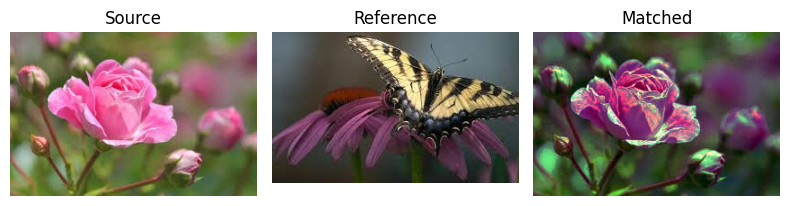

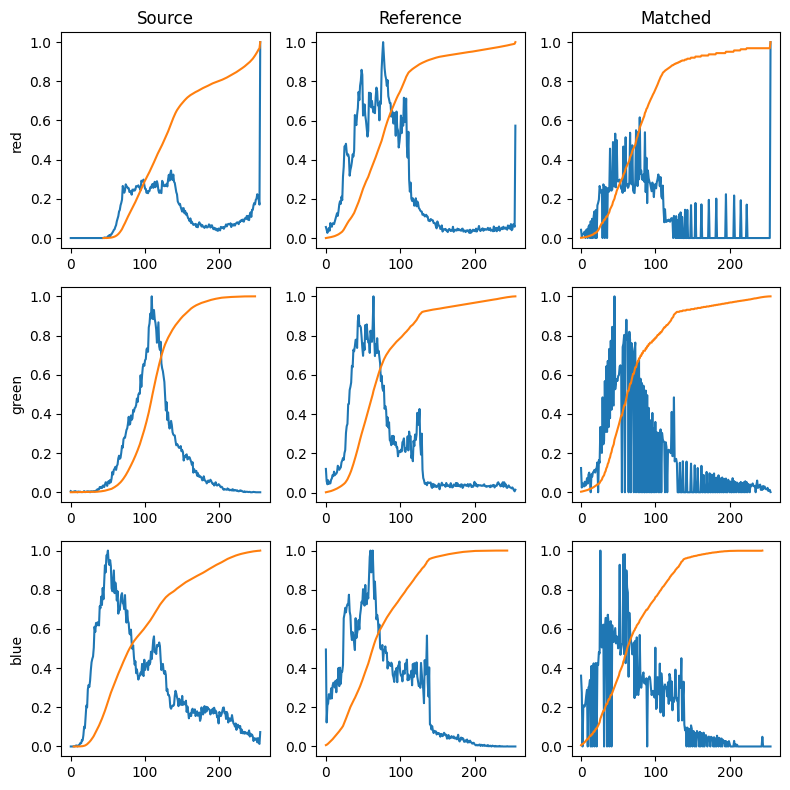

In [71]:
# checking the number of channels
print('No of Channel is: ' + str(img_color_3.ndim))

# checking the number of channels
print('No of Channel is: ' + str(img_color_1.ndim))

image = img_color_3
reference = img_color_1

matched = match_histograms(image, reference ,
						multichannel=True)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,
									figsize=(8, 3),
									sharex=True, sharey=True)

for aa in (ax1, ax2, ax3):
	aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

for i, img in enumerate((image, reference, matched)):
	for c, c_color in enumerate(('red', 'green', 'blue')):
		img_hist, bins = exposure.histogram(img[..., c],
											source_range='dtype')
		axes[c, i].plot(bins, img_hist / img_hist.max())
		img_cdf, bins = exposure.cumulative_distribution(img[..., c])
		axes[c, i].plot(bins, img_cdf)
		axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()
